In [884]:
import pandas as pd

## DATA IMPORT

In [885]:
top = pd.read_csv('/Users/jassjones/Documents/Project4_Final/Resources/Top200.csv')

In [886]:
top.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


In [887]:
top.columns = top.columns.str.lower().str.replace(' ', '_')
top.rename(columns = {'artist': 'artist_name', "song_name": "track_name", "genre" : "genre_list", "chord": "key", "song_id": "track_id", "duration_(ms)": "duration_ms"}, inplace = True)
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1556 non-null   int64  
 1   highest_charting_position  1556 non-null   int64  
 2   number_of_times_charted    1556 non-null   int64  
 3   week_of_highest_charting   1556 non-null   object 
 4   track_name                 1556 non-null   object 
 5   streams                    1556 non-null   object 
 6   artist_name                1556 non-null   object 
 7   artist_followers           1545 non-null   float64
 8   track_id                   1545 non-null   object 
 9   genre_list                 1545 non-null   object 
 10  release_date               1545 non-null   object 
 11  weeks_charted              1556 non-null   object 
 12  popularity                 1545 non-null   float64
 13  danceability               1545 non-null   float

In [888]:
top[["highest_charting_position", "number_of_times_charted"]].describe()

,highest_charting_position,number_of_times_charted
count,1556.000000,1556.000000
mean,87.744216,10.668380
std,58.147225,16.360546
min,1.000000,1.000000
25%,37.000000,1.000000
50%,80.000000,4.000000
75%,137.000000,12.000000
max,200.000000,142.000000


In [889]:
top[top['number_of_times_charted'] > 85]

,index,highest_charting_position,number_of_times_charted,week_of_highest_charting,track_name,streams,artist_name,artist_followers,track_id,genre_list,...,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,key
368,369,5,142,2019-12-27--2020-01-03,Falling,"5,294,368",Harry Styles,16112621.0,1ZMiCix7XSAbfAJlEZWMCp,"['pop', 'post-teen pop']",...,0.567,0.267,-6.502,0.0299,0.839,0.089,110.011,240133.0,0.0592,E


In [890]:
# top_filtered = top[top['number_of_times_charted'] < 85].drop(columns = ['index', 'highest_charting_position', 'week_of_highest_charting', 'streams', 'artist_followers', 'genre_list', 'release_date', 'weeks_charted']).dropna()
# top_filtered.info()

In [891]:
top_filtered = top[top['number_of_times_charted'] < 85].drop(columns = ['index', 'weeks_charted', 'genre_list', 'week_of_highest_charting','release_date']).dropna()
top_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   highest_charting_position  1544 non-null   int64  
 1   number_of_times_charted    1544 non-null   int64  
 2   track_name                 1544 non-null   object 
 3   streams                    1544 non-null   object 
 4   artist_name                1544 non-null   object 
 5   artist_followers           1544 non-null   float64
 6   track_id                   1544 non-null   object 
 7   popularity                 1544 non-null   float64
 8   danceability               1544 non-null   float64
 9   energy                     1544 non-null   float64
 10  loudness                   1544 non-null   float64
 11  speechiness                1544 non-null   float64
 12  acousticness               1544 non-null   float64
 13  liveness                   1544 non-null   float

In [892]:
top_filtered['streams'] = top_filtered['streams'].str.replace(',','').astype(float)

In [893]:
top_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   highest_charting_position  1544 non-null   int64  
 1   number_of_times_charted    1544 non-null   int64  
 2   track_name                 1544 non-null   object 
 3   streams                    1544 non-null   float64
 4   artist_name                1544 non-null   object 
 5   artist_followers           1544 non-null   float64
 6   track_id                   1544 non-null   object 
 7   popularity                 1544 non-null   float64
 8   danceability               1544 non-null   float64
 9   energy                     1544 non-null   float64
 10  loudness                   1544 non-null   float64
 11  speechiness                1544 non-null   float64
 12  acousticness               1544 non-null   float64
 13  liveness                   1544 non-null   float

In [894]:
#top_filtered.info()

In [895]:
top_filtered.key.value_counts()

C#/Db    214
C        155
B        141
G        136
F        131
G#/Ab    130
D        125
A#/Bb    122
F#/Gb    121
A        118
E        111
D#/Eb     40
Name: key, dtype: int64

In [896]:
# Bin similar keys together
top_filtered['key'] = top_filtered['key'].replace('C#/Db', 'C#')
top_filtered['key'] = top_filtered['key'].replace('G#/Ab', 'G#')
top_filtered['key'] = top_filtered['key'].replace('A#/Bb', 'A#')
top_filtered['key'] = top_filtered['key'].replace('F#/Gb', 'F#')
top_filtered['key'] = top_filtered['key'].replace('D#/Eb', 'D#')
top_filtered.key.value_counts()

C#    214
C     155
B     141
G     136
F     131
G#    130
D     125
A#    122
F#    121
A     118
E     111
D#     40
Name: key, dtype: int64

In [897]:
top_filtered.to_csv("/Users/jassjones/Documents/Project4_Final/Resources/top200_cleaned.csv", index = False)

## DATA PREPROCESSING

In [898]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [899]:
#X = top_filtered.drop(columns = ['artist_name', 'track_name', 'track_id', 'number_of_times_charted', 'key'])
#y = top_filtered['number_of_times_charted']

In [900]:
X = top_filtered.drop(columns = ['artist_name', 'loudness', 'track_name', 'track_id', 'number_of_times_charted', 'key'])
y = top_filtered['number_of_times_charted']

In [901]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1555
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   highest_charting_position  1544 non-null   int64  
 1   streams                    1544 non-null   float64
 2   artist_followers           1544 non-null   float64
 3   popularity                 1544 non-null   float64
 4   danceability               1544 non-null   float64
 5   energy                     1544 non-null   float64
 6   speechiness                1544 non-null   float64
 7   acousticness               1544 non-null   float64
 8   liveness                   1544 non-null   float64
 9   tempo                      1544 non-null   float64
 10  duration_ms                1544 non-null   float64
 11  valence                    1544 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 156.8 KB


In [902]:
X.info()
# X_dummy = pd.get_dummies(X)
# X_dummy.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1555
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   highest_charting_position  1544 non-null   int64  
 1   streams                    1544 non-null   float64
 2   artist_followers           1544 non-null   float64
 3   popularity                 1544 non-null   float64
 4   danceability               1544 non-null   float64
 5   energy                     1544 non-null   float64
 6   speechiness                1544 non-null   float64
 7   acousticness               1544 non-null   float64
 8   liveness                   1544 non-null   float64
 9   tempo                      1544 non-null   float64
 10  duration_ms                1544 non-null   float64
 11  valence                    1544 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 156.8 KB


In [903]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [904]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## LINEAR REGRESSION

In [905]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [906]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.25443396579733
Testing Score: 0.29215392972571186


## FEATURE REDUCTION

In [907]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [908]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components=0.90)
spotify_pca = pca.fit_transform(X_train_scaled)
print(spotify_pca.shape)

(1158, 10)


[0.17104306 0.1333169  0.10163664 0.0935703  0.08816201 0.08385126
 0.0721172  0.06550994 0.06404086 0.05357016]


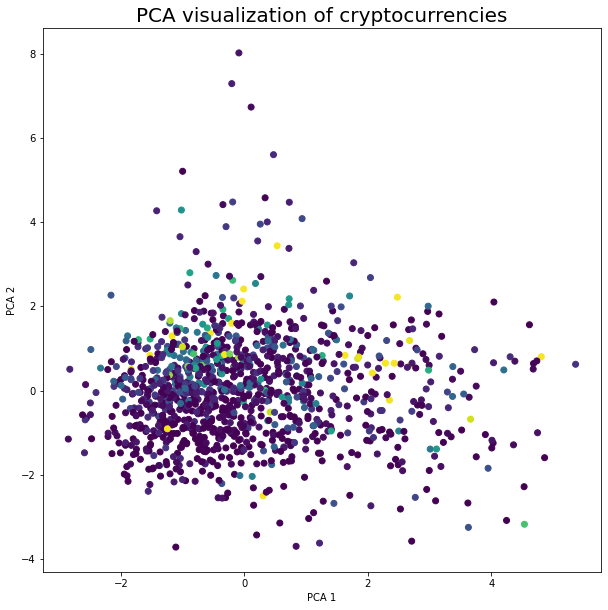

In [909]:
plt.figure(num=None, figsize=(10,10), facecolor='w', edgecolor='k')
plt.scatter(spotify_pca[:, 0], spotify_pca[:, 1], c = y_train)
plt.title('PCA visualization of cryptocurrencies', fontdict={'fontsize': 20})
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
print(pca.explained_variance_ratio_)

In [910]:
# Further reduce the dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
spotify_tsne = tsne.fit_transform(spotify_pca)
print(spotify_tsne.shape)

/Users/jassjones/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jassjones/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1158, 2)


Text(0, 0.5, 't-SNE 2')

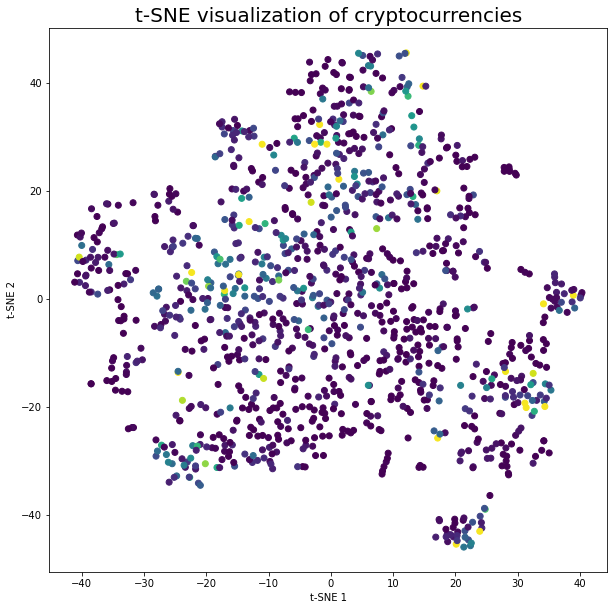

In [911]:
plt.figure(num=None, figsize=(10,10), facecolor='w', edgecolor='k')
plt.scatter(spotify_tsne[:, 0], spotify_tsne[:, 1], c = y_train)
plt.title('t-SNE visualization of cryptocurrencies', fontdict={'fontsize': 20})
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

## Check Collinearity

In [912]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.round(1)

,feature,VIF
0,highest_charting_position,3.7
1,streams,4.9
2,artist_followers,1.9
3,popularity,19.2
4,danceability,23.5
5,energy,24.3
6,speechiness,2.5
7,acousticness,2.5
8,liveness,2.7
9,tempo,16.5


In [913]:
## Remove key
